# 06-3 주성분 분석
##### 차원 축소에 대해 이해하고 대표적인 차원 축소 알고리즘 중 하나인 PCA(주성분 분석) 모델을 만들어봅니다

- 너무 많은 사진이 수집되며 저장공간이 부족해짐
- 군집, 분류에 영향을 미치지 않으면서 업로드된 사진의 용량을 줄일 수 있을까?

### 차원과 차원 축소
- 우리는 데이터가 가진 속성을 특성이라 부름
- 머신러닝에서 이런 특성을 차원(dimension)이라고 부름
- 10,000개의 특성은 10,000개의 차원임 - 이 차원을 줄이고 싶다
- 차원 축소(dimentionality reduction) 알고리즘을 다뤄보자
  - 데이털르 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 지도 학습 모델의 성능을 향상시킬 수 있는 방법
- 줄어든 차원에서 다시 원본 차원(과일 사진의 경우 10,000개의 차원)으로 손실을 최대한 줄이면서 복원 가능
- 대표 차원 축소 알고리즘인 주성분 분석(principal component analysis, PCA)를 배워보자

### 주성분 분석 소개
- PCA는 데이터에 있는 분산이 큰 방향을 찾는 것으로 이해
- 분산이 큰 방향 -> 데이터를 잘 표현하는 어떤 벡터라고 생각할 수 있음
- 데이터의 분포를 가장 잘 표현하는 방향
- 앞서 찾은 직선이 원점에서 출발한다면 두 원소로 이루어진 벡터로 쓸 수 있음
- 이 벡터를 주성분(principal component)라고 부름 - 원본 데이터에 있는 어떤 방향
- 주성분 벡터의 원소 개수는 원본 데이터셋에 있는 특성 개수와 같음 - 원본 데이터는 주성분 분석을 사용해 차원을 줄일 수 있음
- 주성분이 가장 분산이 큰 방향이기 때문에 주성분에 투영하여 바꾼 데이터는 원본이 가지고 있는 특성을 가장 잘 나타내고 있을 것
- 여기서는 2차원이기 때문에 두 번째 주성분의 방향은 하나뿐

### PCA 클래스
- 과일 사진 데이터를 다운로드하여 넘파이 배열로 적재합니다

In [1]:
# !wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

- PCA 클래스의 객체를 만들 때 n_components 매개변수에 주성분의 개수를 지정해야 함
- k-평균과 마찬가지로 비지도 학습이기 때문에 fit()메서드에 타깃값 지정 X

In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [3]:
print(pca.components_.shape)

(50, 10000)


- pca.components_ 배열의 첫 번째 차원이 50, (50개의 주성분을 찾은 것)
- 두 번쨰 차원은 항상 원본 데이터의 특성 개수와 같은 10,000임
- 원본 데이터와 차원이 같으므로 주성분을 100X100 크기의 이미지처럼 출력해볼 수 있음
- draw_frutis() 함수로 주성분 그림을 그려보자

In [4]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
    n = len(arr) # n은 샘플 개수
    # 한 줄에 10개씩 이미지를 그림. 샘플 개수를 10으로 나누어 전체 행 개수를 계산
    rows = int(np.ceil(n/10))
    # 행이 1개이면 열의 개수는 샘플 개수. 그렇지 않으면 10개
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n: # n개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

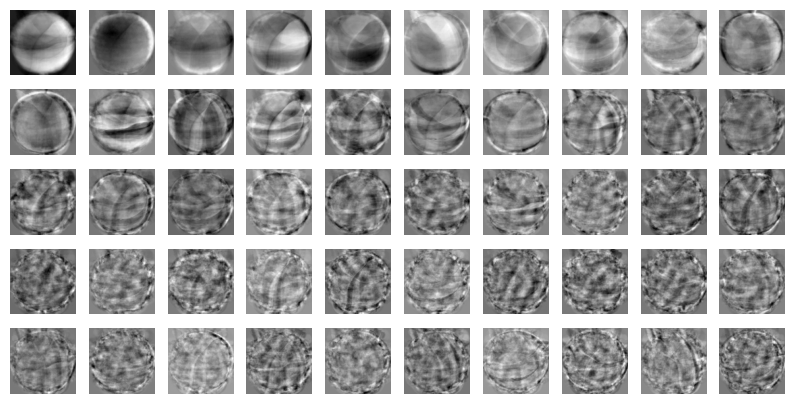

In [5]:
draw_fruits(pca.components_.reshape(-1,100,100))

- 이 주성분은 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것
- 주성분을 찾았으므로 원본 데이터를 주성분에 투영하여 특성 개수를 10,000개에서 50개로 줄일 수 있음
- PCA의 transform() 메서드를 사용해 원본 데이터의 차원을 50으로 줄여보자

In [6]:
print(fruits_2d.shape)

(300, 10000)


In [8]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


- 주성분의 PCA 모델을 사용해 (300, 10000) 크기를 -> (300, 50)으로 줄임
- 이제 데이터 원상복구를 해보자

### 원본 데이터 재구성
- 손실이 발생했지만 원본 데이터를 상당부분 재구성 가능
- PCA 클래스의 inverse_transform() 메서드

In [9]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


- 10,000개 특성으로 복원됨
- 복원한 것을 다시 확인

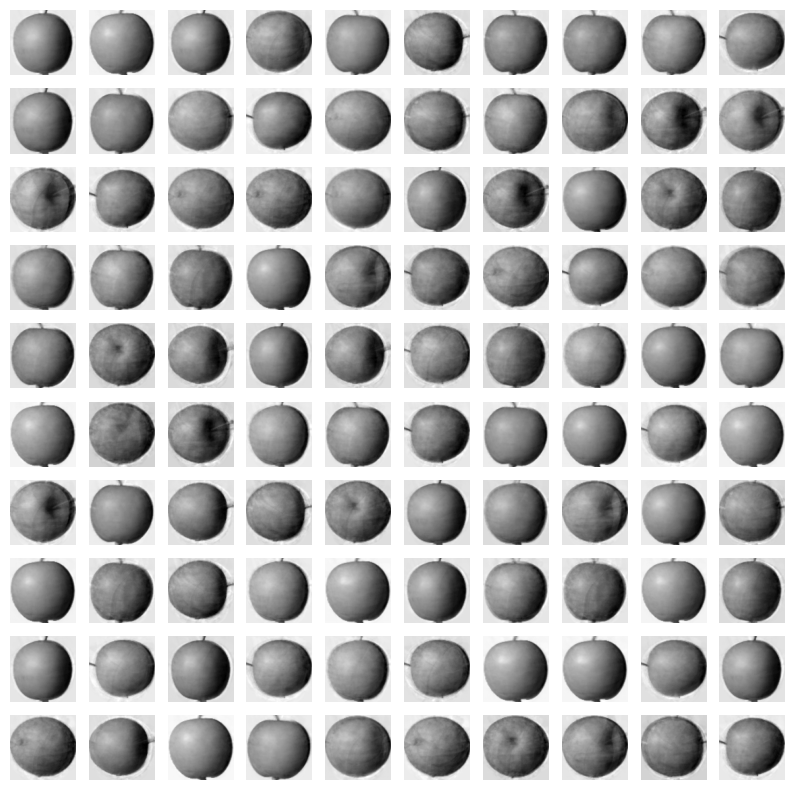

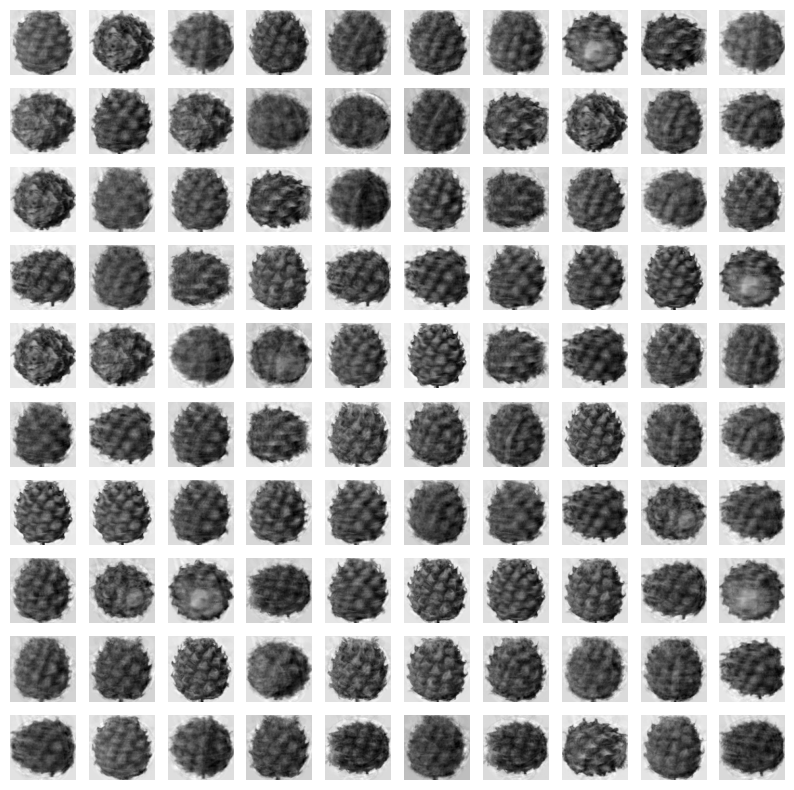

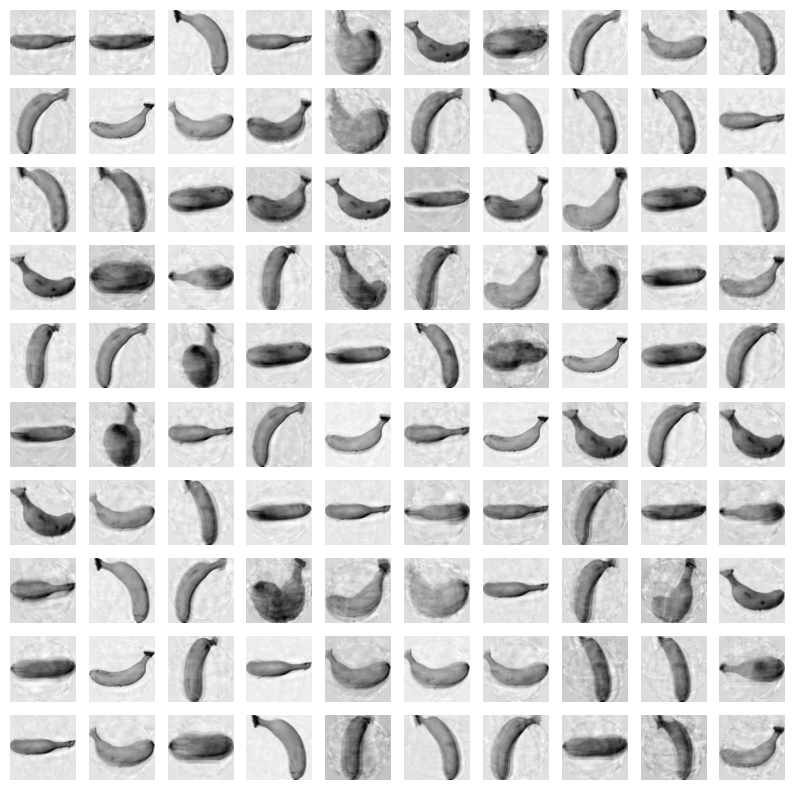

In [10]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

- 흐리고 번진 부분이 있지만 50개 특성을 10,000개로 늘린 것!
- 그럼 50개의 특성은 얼마나 분산을 보존하고 있는 것일까?

### 설명된 분산 (explained variance)
- 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값
- PCA 클래스의 explained_variance_ratio_에 각 주성분의 설명된 분산 비율이 기록되어 있음
- 첫 번재 주성분의 설명된 분산이 가장 큼
- 이 분산 비율을 모두 더하면 50개 주성분으로 표현하고 있는 총 분산 비율을 얻을 수 있음

In [11]:
print(np.sum(pca.explained_variance_ratio_))

0.92159621707422


- 92%가 넘는 분산을 유지
- 설명된 분산 비율을 그래프로 그리면 적절한 주성분의 개수를 찾는데 도움이 됨

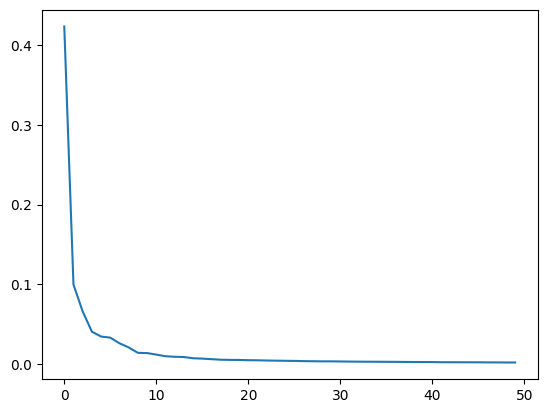

In [12]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

- 이 그래프는 처음 10개의 주성분이 대부분의 분산을 표현하고 있음을 확인할 수 있음
- PCA로 차원 축소된 데이터를 사용하여 지도 학습 모델을 훈련해보자 (원본 데이터 사용했을때와의 차이도 보자)

### 다른 알고리즘과 함께 사용하기
- 과일 사진 원본 데이터와 PCA로 축소한 데이터를 지도 학습에 적용해 보고 어떤 차이가 있는지 알아봅니다
- 3개 과일 사진 분류를 위해 로지스틱 회귀 모델을 사용

In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

- 타깃값 지정 (사과 0, 파인애플 1, 바나나 2)

In [14]:
target = np.array([0]*100 + [1]*100 + [2]*100)

- 원본 데이터 fruits_2d 사용
- 성능 가늠을 위해 교차검증(cross_validate()) 수행

In [17]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.4133336067199707


- 교차 검증의 점수는 0.997. 특성이 10,000개나 되기 때문에 300개 샘플에서는 금방 과대적합된 모델을 만들기 쉬움
- cross_validate() 함수가 반환되는 딕셔너리에는 fit_time 항목에 각 교차 검증 폴드의 훈련 시간이 기록되어 있음(0.41초 정도)
- 이 값을 PCA로 축소한 fruits_pca를 사용했을때와 비교

In [18]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.017649078369140626


- 50개 특성만으로도 정확도가 100%, 훈련 시간은 0.017초로 줄어들었음
- PCA 클래스 사용할 때 n_components 매개변수에 주성분의 개수를 지정 -> 원하는 설명된 분산의 비율 입력 가능
- 지정된 비율에 도달할 때까지 자동으로 주성분을 찾음 -> 설명된 분산의 50%에 달하는 주성분을 찾도록 PCA 모델을 만들어 보겠습니다

In [19]:
pca = PCA(n_components = 0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

- 이제 몇 개의 주성분을 찾았는지 확인해보자

In [20]:
print(pca.n_components_)

2


- 2개 특성으로 50%를 표현 가능
- 이 모델로 원본 데이터를 변환. 크기는 (300, 2)가 될 것

In [21]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


- 2개의 특성만 사용하고도 교차 검증의 결과 확인

In [22]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.99
0.02295069694519043


/Users/jeremyshin/.pyenv/versions/3.11.3/envs/hongong/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jeremyshin/.pyenv/versions/3.11.3/envs/hongong/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

- 위의 경고(Convergence Warning: ..) -> 로지스틱 회귀 모델이 완전히 수렴하지 못했으니 반복 횟수를 증가하라는 경고 문구임
- 2개 특성으로 99% 정확도 달성
- 이번에는 차원 축소 데이터를 사용해 k-평균 알고리즘을 클러스터를 찾아보겠습니다

In [23]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


/Users/jeremyshin/.pyenv/versions/3.11.3/envs/hongong/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


- fruits_pca로 찾은 클러스터는 각각 91개, 99개, 119개의 샘플을 포함하고 있음
- 이는 2절에서 원본 데이터 사용했을때와 거의 비슷
- Kmenas가 찾은 레이블을 사용해 과일 이미지 출력

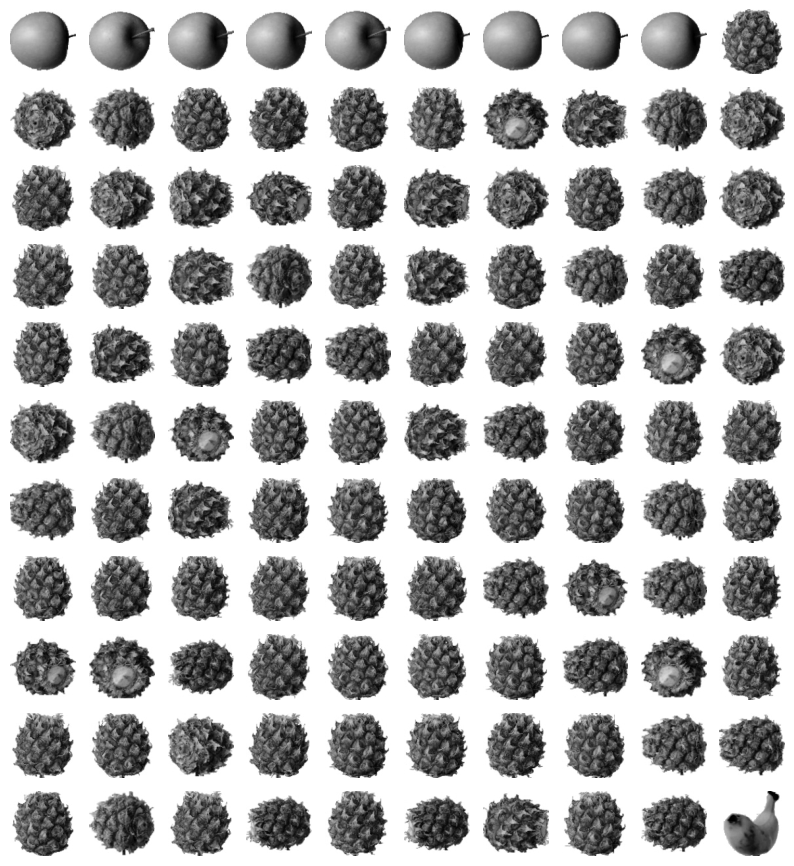

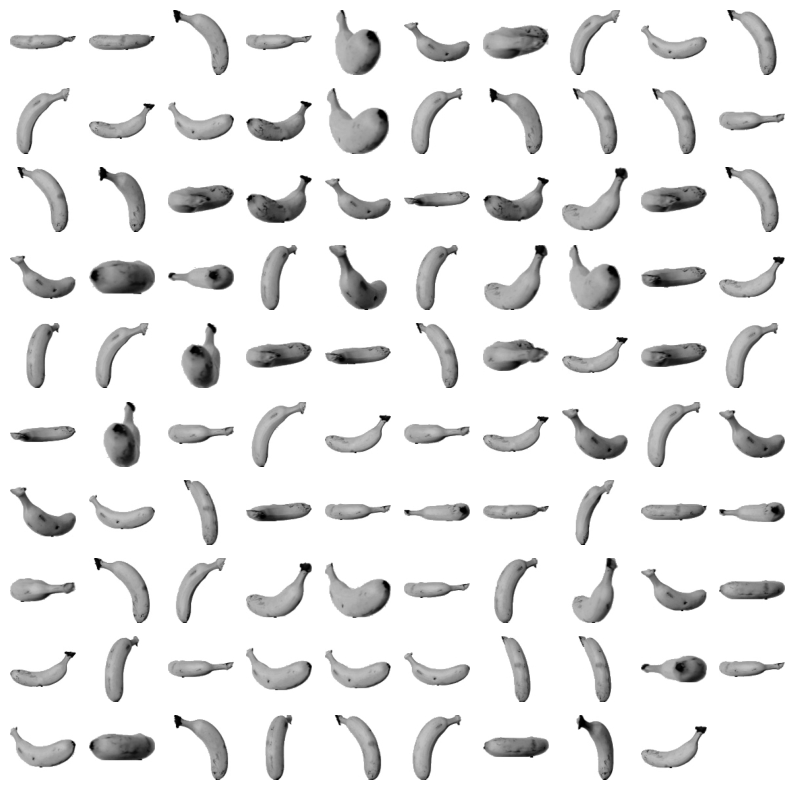

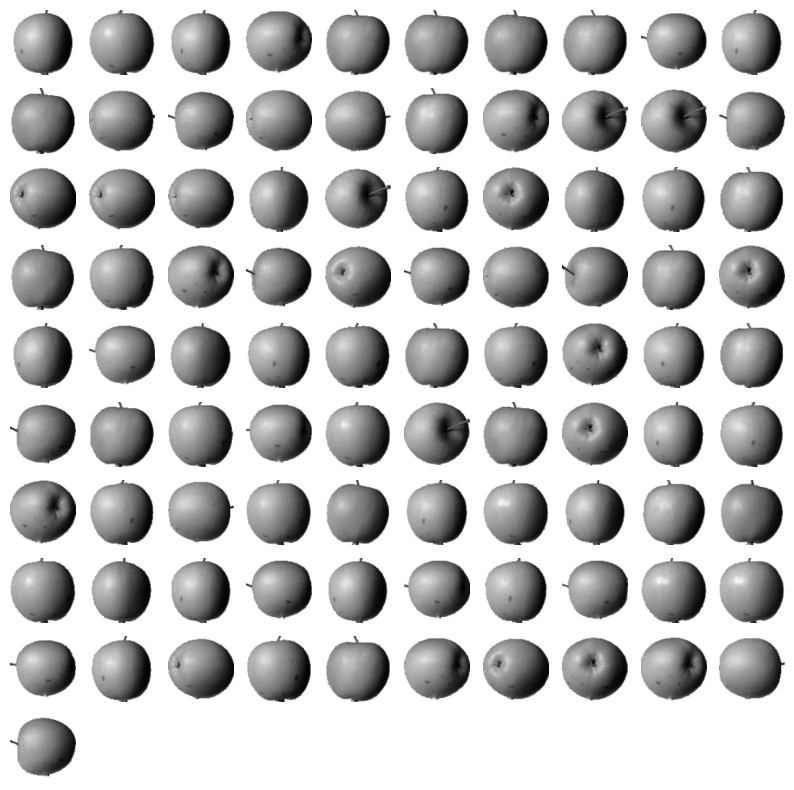

In [24]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

- 2절에서 찾은 클러스터와 비슷하게 파인애플은 사과와 조금 혼돈되는 면이 있음
- 몇 개의 사과가 파인애플 클러스터에 섞여 들어가있음
- 훈련 데이터 차원을 줄이면 또 하나 얻을 수 있는 장점은 시각화
  - 3개 이하로 차원을 줄이면 화면에 출력하기 비교적 쉬움
  - fruits_pca 데이터는 2개 특성이 있기 때문에 2차원으로 표현 할 수 있음
  - km.labels_를 사용해 클러스터별로 나누어 산점도를 그려보자

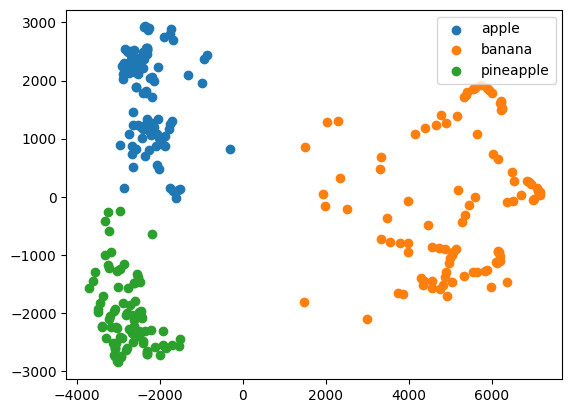

In [26]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

- 각 클러스터 산점도가 아주 잘 구분됨
- 2개 특성만 사용했지만 로지스틱 회귀 모델 교차 검증 점수가 99%에 달하는 이유!
- 그림에서 사과와 파인애플 클러스터의 경계가 가깝게 붙어 있음 - 두 클러스터 샘플은 몇 개가 혼동을 일으키기 쉬움
- 데이터를 시각화하면 예상치 못한 통찰을 얻을 수있습니다. 이런 측면에서 차원 축소는 매우 유용한 도구 중 하나입니다. 